In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [2]:
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in
sns.set() # use default seaborn style

# Video W3 01: Classification

[YouTube Video Link](https://www.youtube.com/watch?v=K5oZM1Izn3c&index=33&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

In the past 2 weeks we were looking at what were known as regression problems, and trying to build a model
using linear regression.  I always think of a regression problem as simply trying to find a function that
maps a set of inputs, into a real valued, continuous output.  For example, for all practical purposes we
could consider the price of a house that we were trying to predict as a real valued number.  The selling
price of the house could take on any real value from 1000's of dollars to many millions of dollars, and
any real value in between these 2 extremes.  The task of linear regression was to take 1 or more input
values that we used as our input features, and determine a hypothesis, or model or map, that best fit
any particular input to a predicted house price.

This week we will be transitioning to a slightly different task, that of classification.  The main
difference when we are trying to build a model for a classification problem, is that the thing we are
trying to predict is no longer some real valued continuous property, but instead we are trying to predict
which class among a small but discrete set of possible classes some thing will belong to given a set
of input features.  Some examples of classification tasks that have been mentioned in this video and
previously include:

- Email: Spam / Not Spam?
- Online Transactions: Fradulent / Valid?
- Tumor: Malignant / Benign?

In all of these problems, we can think of the variable that we are trying to predict as taking on one of
two discrete possibilities:

$$
y \in \{0, 1\} \quad
\begin{cases}
    0: & \displaystyle \text{"Negative Class" (e.g. benign tumor)} \\
    1: & \text{"Positive Class" (e.g. malignant tumor)} \\
\end{cases}
$$

The videos start with classification problems that only have 2 classes (known as
binary classification problems).  However, it is perfectly
acceptable and easy to extend the basic algorithms we will work on to problems with 3 or more
classes (multiclass classification).

## Linear Regression vs. Logistic Regression to Perform Classification

You can make up examples where using linear regression would appear to work for a classification task.
However, in general, except for special situations, linear regression is not going to work.

Instead, logistic regression was developed to address classification problems. Logistic regression is
probably badly named, but for historical reasons the term stuck.  A better name might be logistic 
classification.  One property of logistic regression is that the algorithm will be developed in such
a way so that the hypothesis we get is always a value between 0 and 1:

$$
0 \le h_{\theta}(x) \le 1
$$

As discussed in the video, we then usually choose some threshold, say $\text{threshold} = 0.5$, and all
values less than the threshold are classified as the 0 or "Negative Class" and all those above the
threshold will be classified as 1 or the "Positive Class".

# Video W3 02: Hypothesis Representation

[YouTube Video Link](https://www.youtube.com/watch?v=WiDuvuM1JyI&index=34&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

What is the function we are going to use to represent our hypothesis for a classification problem?  We 
would like our hypothesis to have the property that it is always constrained to be between 0 and 1.

For logistic regression, we modify the linear regression hypothesis to pass it through what is known
as the logistic function $g(z)$.  Thus our hypothesis function becomes:

$$
h_{\theta}(x) = g(\theta^T x)
$$

Where we define the logistic function to be:

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

This logistic function is also known as the sigmoid function, because of the shape the function makes 
looks like lazy s:

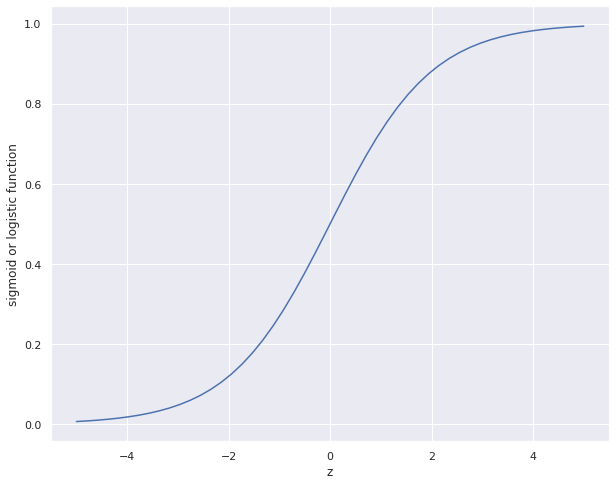

In [3]:
z = np.linspace(-5, 5, 50)

def g(z):
    return 1.0 / (1.0 + np.exp(-z))

plt.plot(z, g(z))
plt.xlabel('z')
plt.ylabel('sigmoid or logistic function');

Notice that the output of the function is always between 0 and 1.  The more negative of a number you
give to the function, the closer to 0 the output is, and the more positive, the closer the function
approaches to 1.  The function has a value of 0.5 when $z = 0$.  Thus if we use 0.5 as a threshold, then
an input that is less than 0 will be classified as 0, the negative class, and any input that is greater
than 0 will be classified as 1, the positive class.  However, note that the actual output, before we
threshold the result, is a real valued hypothesis such that $0 \le h_{\theta}(x) \le 1$.

**Interpretation of Hypothesis Output**

One interpretation of the hypothesis is that it is a measure of the estimated probability that
$y = 1$ given input x.  So for example if the hypothesis has an output of 0.7, you might interpret
that as a 70% chance that the positive class is true.  If we want to state what the probability
is for the negative class, we have to use $1 - h_{\theta}(x)$, so the probability of the previous
that it is the negative class is 30%.

# Video W3 03: Decision Boundary

[YouTube Video Link](https://www.youtube.com/watch?v=ZB3jIH5Oms8&index=35&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

Suppose we set the threshold at $h_\theta(x) \ge 0.5$ to predict $y = 1$.  When is it exactly that
$h_\theta(x)$ will be above the threshold so that we will predict 1?  This of course happens when
$g(z) \ge 0.5$ which means that we will predict 1 when $\theta^Tx \ge 0$ and we will predict 0 when this
is less than 0.  

The boundary where the $\theta^Tx$ crosses over from negative to positive is the **decision boundary**
that our model creates.  The location of the decision boundary is of course a function of the $\theta$
parameter values.  The decision boundry will be a line or a hyperplane, depending on the number of 
input parameters we are dealing with in our problem.

For example, the video uses a small made up example to illustrate this at the 5 minute mark.  Lets say
we have the following input training values $x_1, x_2$ and the output vlaues $y$

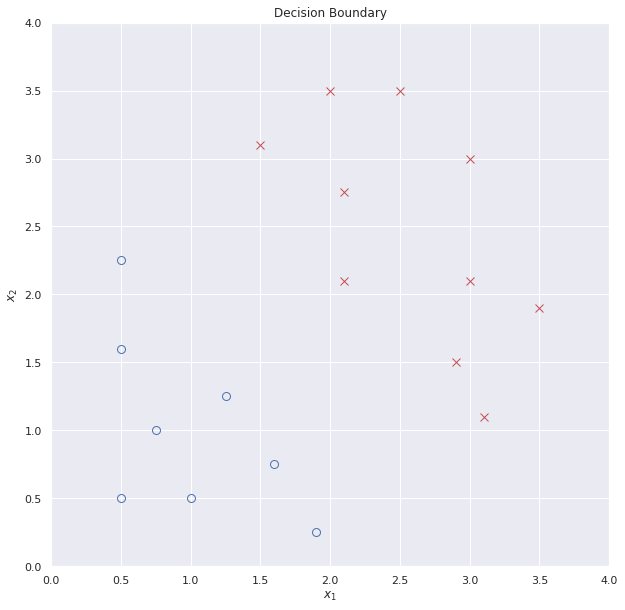

In [4]:
x = np.array([[0.5, 0.5],
              [1.0, 0.5],
              [0.75, 1.0],
              [1.9, 0.25],
              [1.6, 0.75],
              [1.25, 1.25],
              [0.5, 1.6],
              [0.5, 2.25],
              [3.1, 1.1],
              [2.9, 1.5],
              [2.1, 2.1],
              [2.1, 2.75],
              [1.5, 3.1],
              [3.5, 1.9],
              [3.0, 2.1],
              [3.0, 3.0],
              [2.0, 3.5],
              [2.5, 3.5]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

neg_idx = np.where(y == 0)
pos_idx = np.where(y == 1)

# plot the example figure
plt.figure(figsize=(10,10))

# plot the points in our two categories, y=0 and y=1, using markers to indicated
# the category or output
plt.plot(x[neg_idx,0], x[neg_idx,1], 'bo', markersize=8, fillstyle='none', markeredgewidth=1) 
plt.plot(x[pos_idx,0], x[pos_idx,1], 'rx', markersize=8, markeredgewidth=1) 

# add some labels and titles
plt.axis([0, 4, 0, 4])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision Boundary');

Let us suppose that we have the hypothesis:

$h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$

and that we have determined the following values for $\theta$:

$\theta_0 = -3, \theta_1 = 1, \theta_2 = 1$

We wil predict $y = 1$ if $-3 + x_1 + x_2 \ge 0$

The equation:

$x_1 + x_2 = 3$

is the decision boundary of this particular set of $\theta$ parameters.  This is the equation of a straight line, that passes through $(0, 3)$ and $(3, 0)$:

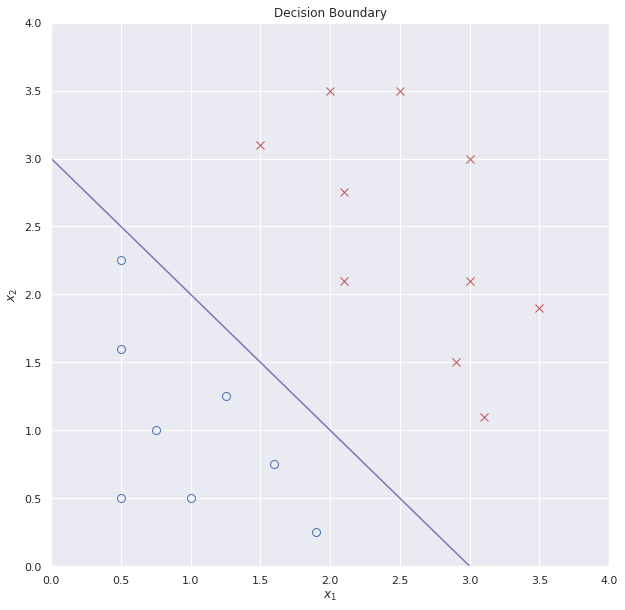

In [5]:
plt.figure(figsize=(10,10))

# plot the points in our two categories, y=0 and y=1, using markers to indicated
# the category or output
plt.plot(x[neg_idx,0], x[neg_idx,1], 'bo', markersize=8, fillstyle='none', markeredgewidth=1) 
plt.plot(x[pos_idx,0], x[pos_idx,1], 'rx', markersize=8, markeredgewidth=1) 

# plot the line x_1 + x_2 = 3
x1 = np.array([0, 3])
x2 = np.array([3, 0])
plt.plot(x1, x2, 'm-')

# add some labels and titles
plt.axis([0, 4, 0, 4])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Decision Boundary');
#plt.grid();

If  you check, you will see any $x_1, x_2$ pair that is to the right or above the magenta line
(or on it) will have a value $ \ge 3$, and those below and to the left are less than $3$.  Conversely,
after running any pair of $x_1, x_2$ through our logistic function, all those points above and to the
right will have a value greater than the $0.5$ threshold, and those to the left and below will be less
than the threshold.

**Higher Order Polynomial Terms**

We talked briefly about non-linear terms when doing regression before, and we can use non-linear terms to define a decision boundary for logistic regression as well.  For example, instead of simply using 
linear terms of $x_1$ and $x_2$, we could also use polynomial terms like $x_1^2$ and $x_2^2$ in our
hypothesis:

$h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2)$

If we use the following values for our $\theta$ parameters 
$\theta_0 = -1, \theta_1 = 0, \theta_2 = 0, \theta_3 = 1, \theta_4 = 1$ then we end up with the
equation:

$x_1^2 + x_2^2 = 1$

controlling the decision boundary.  This is of course the equation of a circle of radius 1 centered
on the origin:


Text(0, 0.5, '$x_2$')

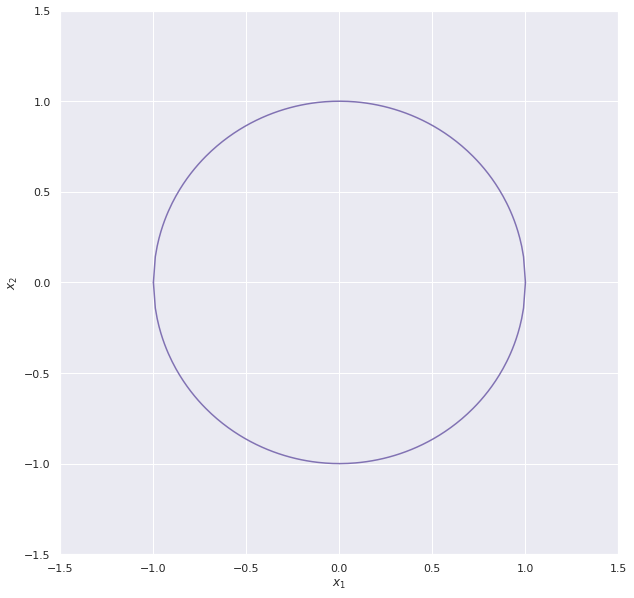

In [6]:
# create points on decision bounadry, x_2 = +/- sqrt(1 - x_1^2)
x1 = np.linspace(-1.0, 1.0, 200)
x2pos = np.sqrt(1 - x1**2.0)
x2neg = -np.sqrt(1 - x1**2.0)

# plot the circle
plt.figure(figsize=(10,10))
plt.plot(x1, x2pos, 'm-')
plt.plot(x1, x2neg, 'm-')

# add labels and titles
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.grid();

Points inside of the circle, given the $\theta$ parameters, will be less than 0, and thus will be
categorized as the 0 category given the logistic function, and those points outside of the circle will
be categorized as the 1 category.

# Video W3 04: Cost Function

[YouTube Video Link](https://www.youtube.com/watch?v=4apOGNHzGbk&index=36&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

**Summary of our Logistic Classification Problem**

Recall that we have a training set of $m$ examples: 

**Traing Set:** $\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(m)}, y^{(m)}),  \}$

The notation $x^{(1)}$ does not refer to exponentation here.  This notation simply means we have
a set of $m$  training data, where input 1 $x$ has a correct classification denoted by $y^{(1)}$
and we have input and output example 2, 3 up to example $m$.

Each input can consist of 1 or more features:

**m examples:** 

$$
x \in
\begin{bmatrix}
x_0 \\ 
x_1 \\ 
\ldots \\ 
x_n \\ 
\end{bmatrix}
x_0 = 1, y \in \{0, 1\}
$$

Remember by convention if we have $n$ actual features, we use $n+1$ input values in our equations, and
we set feature $x_0 = 1$.  At this point we are only talking about logistic classification of
problems with two categories, thus $y \in \{0, 1\}$.  We will later discuss classification problems
that have more than 2 categories.

Finally we run our hypothesis through the logistic function to get a value between 0.0 and 1.0 which we
can use as an estimate of the probability that our hypothesis is predicting the inputs should be in
the 1 category:

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

The big question then is, how do we choose the $\theta$ parameters so that we end up with a good
hypothesis that maximizes our ability to correctly predict the categories of future data?

**Cost Function**

Recall that for linear regression, we were basically using a cost function that looked somthing like

$$
\textrm{Cost}(h_\theta(x), y) = \frac{1}{2} \big( h_\theta(x) - y \big)^2
$$

That is to say, the cost of one particular input, given a current hypothesis, is simply the
square of the difference between our prediction and the actual output (times 1/2).  Also recall that
for our gradient descent, to get the total cost we simply summed up this squared difference over all
of our training inputs for a given hypothesis.

Unfortunately, when we are trying to do logistic regression, remember that the hypothesis function
is now run through the logistic function before getting the final result. As discussed in the video
this makes the cost function into a non-convex function, which would cause problems for our
gradient descent algorithm, since there are now many local minima, and we would thus have problems
to determine if we are at the global minimum or not.

So instead, we have to use a completely different cost function for Logistic Regression:

$$
\textrm{Cost}(h_\theta(x), y) = 
\begin{cases}
    -log(h_\theta(x)) & \displaystyle \text{if} \quad y = 1 \\
    -log(1 - h_\theta(x)) & \text{if} \quad y = 0 \\
\end{cases}
$$

In the video we now plot this cost function for the two cases.  Recall that we know that the
hypothesis for our logistic regression, since it is put through the logistic function, will always
be a value between 0 and 1.  Thus we can see what the cost function will look like easily enough:

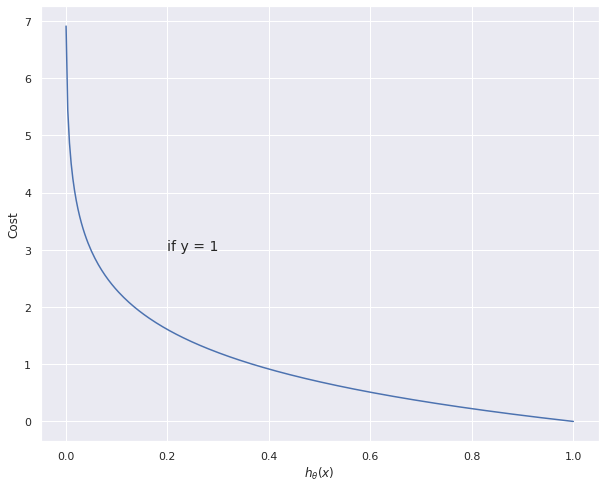

In [7]:
hypothesis = np.linspace(0.001, 1.0, 300)
cost = -np.log(hypothesis)

plt.plot(hypothesis, cost, 'b-')
plt.xlabel(r'$h_\theta(x)$')
plt.text(0.2, 3, r'if y = 1', fontsize=14)
plt.ylabel(r'Cost');

Notice that for the case where the correct output is 1, the cost goes to 0 as the hypothesis approaches
the correct cost.  On the other hand, the cost rapidly goes towards $\infty$ as the hypothesis 
approaches 0 when the correct output is 1. (In fact the logarithm is not defined at 0, so we have to
be careful with this cost function, if we ever have a hypothesis that is actually 0 we might get
nonsensical results).

The situation is similar for the case where the correct output is 0, but we of course have a cost of
0 when our hypothesis is 0, close to the correct answer, and it rapidly approaches $\infty$ as the
hypothesis approaches the incorrect conclusion of 1.

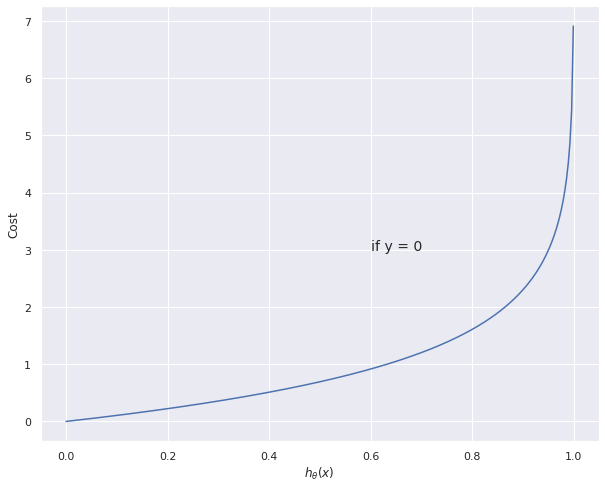

In [8]:
hypothesis = np.linspace(0.0, 0.999, 300)
cost = -np.log(1.0 - hypothesis)

plt.plot(hypothesis, cost, 'b-')
plt.xlabel(r'$h_\theta(x)$')
plt.text(0.6, 3, r'if y = 0', fontsize=14)
plt.ylabel(r'Cost');

# Video W3 05: Simplified Cost Function and Gradient Descent

[YouTube Video Link](https://www.youtube.com/watch?v=kvqmFtmKzzM&index=37&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

To summarize again so far:

**Logistic Regression cost function**

$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m \textrm{Cost}(h_\theta(x^{(i)}), y^{(i)})
$$

$$
\textrm{Cost}(h_\theta(x), y) = 
\begin{cases}
    -log(h_\theta(x)) & \displaystyle \text{if} \quad y = 1 \\
    -log(1 - h_\theta(x)) & \text{if} \quad y = 0 \\
\end{cases}
$$

Note: $y = 0$ or $1$ always, we are still only talking about logistic regression with two categories.

We can specify the cost function in an alternative form, so that we don't have to have a condition 
statement in our code to implement it:

$$
\textrm{Cost}(h_\theta(x), y) = -y \; \textrm{log} (h_\theta(x)) - (1 - y) \; \textrm{log} (1 - h_\theta(x))
$$

This cost function is actually convex, so gradient descent will again work just fine if we use this
alternative cost function for logistic regression classification problems.  To fit the parameters
$\theta$, we want to find the parameters such that they minimize the cost function $J(\theta)$,
which is summed over all of our input/output training examples.

So our gradient descent for logistic regression looks like the following:

**Gradient Descent**

$$
J(\theta) = -\frac{1}{m} \big[ \sum_{i=1}^m  y^{(i)} \; \textrm{log} (h_\theta(x^{(i)})) + (1 - y^{(i)}) \; \textrm{log} (1 - h_\theta(x^{(i)})) \big]
$$

Want $\textrm{min}_\theta \; J(\theta)$:

Repeat {
$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
$$
}

where we simultaneously update all of the $\theta_j$ parameters.  The partial derivative can again
be derived from calculus.  If we do this, we get the following form for the gradient descent:

Repeat {
$$
\theta_j := \theta_j - \alpha \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)}
$$
}

This equation for the update rule for gradient descent looks identical to what we had for linear
regression!  The only thing that has changed for logistic regression is that the definition of our
hypothesis has actually changed, and we are using the logistic function now inside of the hypothesis.

# Video W3 06: Advanced Optimization

[YouTube Video Link](https://www.youtube.com/watch?v=GsOGzLhAQsE&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=38)

This video discusses the use of some alternative optimization algorithms to gradient descent.  Gradient
descent is the simplest iterative optimization method, and is relatively easy to understand and program.
There are many other more advanced iterative optimization techniques.  The video mentions 3 others,
including Conjugate gradient, BFGS, and L-BFGS.  How these methods work is beyond the scope of this
course.  However, there are standard implementations of these more advanced optimization methods
available in the SciPy and SciKitLearn libraries.  Understanding what the cost function is, and how
to specify the partial derivative of the cost function, is important, because all of these libraries ask
you to create a function that implements the cost function and/or derivative term, and then implement
the optimization method for you.

Advanced optimization methods often have many advantages over gradient descent.  They usually don't have a learning rate parameter, they instead pick and adjust learning rate parameters automatically, as part of
the optimization algorithm.  Also, advanced optimization methods are often faster than gradient descent.
But these properties come at a cost of complexity of the algorithms, and they are much harder to
understand and implement.

As mentioned in the video, we normally would not implement this advanced optimization methods by hand, 
just as we wouldn't normally write our own function to calculate square roots or sines of numbers.
Also, as in the video, there are Python libraries that implement these advanced optimizaiton methods.
In this notebook, we show the equivalent of writing cost functions and using the SciPy Optimization
library implementation to optimize a logistic regression classification problem.

The example from the video used the following cost function with the shown partial derivative with
respect to the two parameters of the cost function:

$$
J(\theta) = (\theta_1 - 5)^2 + (\theta_2 - 5)^2
$$

$$
\frac{\partial}{\partial \theta_1} J(\theta) = 2(\theta_1 - 5)
$$

$$
\frac{\partial}{\partial \theta_2} J(\theta) = 2(\theta_2 - 5)
$$

In [9]:
def cost_function(theta):
    """Given an array of [theta_0, theta_1] values, calculate the cost J(theta)
    NOTE: arrays in Python are 0 based, so we change to theta_0, theta_1 in our notation"""
    cost = (theta[0] - 5.0)**2.0 + (theta[1] - 5.0)**2.0
    return cost

def gradient_cost_function(theta):
    """Return the partial derivative, or gradient, with respect to the theta parameters"""
    gradient = np.zeros(2)
    gradient[0] = 2.0 * (theta[0] - 5)
    gradient[1] = 2.0 * (theta[1] - 5)
    return gradient

from scipy.optimize import minimize
theta = np.zeros( 2 ) # initial theta parameters to start gradient descent from
res = minimize(cost_function, theta, method='BFGS', jac=gradient_cost_function, 
               options={'disp': True})
print(res.x) # res is n object, the x variable in res has the optimized parameters

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 4
[5. 5.]


In [10]:
# try the Conjugate gradient
theta = np.zeros( 2 ) # initial theta parameters to start gradient descent from
res = minimize(cost_function, theta, method='CG', jac=gradient_cost_function, 
               options={'disp': True})
print(res.x) # res is n object, the x variable in res has the optimized parameters

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 7
         Gradient evaluations: 7
[4.99999999 4.99999999]


In [11]:
# try the L-BFGS
theta = np.zeros( 2 ) # initial theta parameters to start gradient descent from
res = minimize(cost_function, theta, method='L-BFGS-B', jac=gradient_cost_function, 
               options={'disp': True})
# hmmm.. I don't know why we don't get the display sumary for the L-BFGS-B method,
# could be a bug?
print(res.x) # res is n object, the x variable in res has the optimized parameters

[5. 5.]


You'll notice that there are certainly differences in using the methods from octave/matlab example shown
in the video.  The Python `SciPy` library expects that if you want to use the gradient in the 
optimization, that you have separate functions for the cost function and calculating the partial
derivatives (also known as the gradients in this context).  In `SciPy` you can specify which optimization
method to use using the `method=` parameter.  I have also turned on the option to display information
about the optimization.  Of course, the correct answer is $5.0, 5.0$ where the optimal parameters occur.
But also notice the difference in the number of iterations that are needed, and the number of function
and gradient evaluations that are needed.


# Video W3 07: Multiclass Classification: One-vs-All

[YouTube Video Link](https://www.youtube.com/watch?v=BzSsQWhDRXE&index=39&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)


How to get logistice regression to work for more than 2 categories.  We often have (many) more than
2 categories.  

So given a data set with 3 (or more) classes, how do we extend logistic regression to deal with multiple
classes?  The simple answer is to build multiple and fit multiple classifiers using one-vs-all (or
one-vs-rest).  e.g. If we have x classes, we will need to build x classifiers.  Once we have done this,
to make a prediction on a new input, we simply get all x hypothesis from our x classifiers, and we
choose the one that is the most confident (e.g. that has the highest output).



# Video W3 08: Regularization: The Problem of Overfitting

[YouTube Video Link](https://www.youtube.com/watch?v=C2zKaaKP1gc&index=40&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

**What is Overfitting**

This is a very important video.  If we have too many features, the learned hypothesis may fit the
training set very well, but it may fail to generalize well to new (unseen) examples.  We can have to
few as well, so that the model doesn't predict even trained points all that well.  The goal is to find
a model (and a number of parameters) that is "just right" for some value of "just right".
Overfitting and underfitting can be problems both for linear regression, and for logistic
regression classification problems.

**What to do about Overfitting**

If we have just 2 features, we can plot it and maybe just "see" that our model overfits and is very 
"wiggly".  But this is not a realistice way of addressing the problem when we have lots of features.
Also when we have lots of features, some features are actually useful, whereas other features are often
not so useful, or are redundant with other features.  We have 2 options to address overfitting:

1. Reduce the number of features
   - We can either do this manually by selecting features
   - Later we will look at feature selection algorithms, (dimension reduction, PCA, etc.)
2. Regularization
   - Keep all the features, but reduce magnitude/values of parameters \theta_j
   - Works well when we have a lot of features, each of which contributes a bit to predicting y
   


# Video W3 09: Regularization: Cost Function

[YouTube Video Link](https://www.youtube.com/watch?v=yMeWKGVZRf8&index=41&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

As discussed, the general idea of regularization is to add a penality term to the cost function, that
penalizies the cost when parameters get too big.  So we can modify our standard cost function as:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \big(h_\theta(x^{(i)} - y^{(i)} \big)^2 + \lambda \sum_{j=1}^{m} \theta_j^2
$$

Where $\lambda$ is a regularization parameter, that can be used to controll the amount of effect that regularization has on the cost function.

# Video W3 10: Regularized Linear Regression

[YouTube Video Link](https://www.youtube.com/watch?v=Z959eu-_jNk&index=42&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

As shown in the video, the modification to support regularization only changes slightly the update
rule for the $\theta_j$ parameters.  As shown in the derivation of the update terms, one way to look
at regularization is as a simple intiution that it is simply reducing $\theta_j$ by a little bit each
time in the iteration towards 0, and only the gradient term pushes it towards positive terms.

# Video W3 11: Regularized Logistic Regression

[YouTube Video Link](https://www.youtube.com/watch?v=gKBCTZwa3s8&index=43&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

Adding a regularization term for logistic regression has similar properties and issues.  As mentioned at
the end of this video is a good summary of what would need to be done to create cost and gradient 
functions to use the optimization libraries from high level languages like Python and Matlab/Octave.


In [12]:
import sys
sys.path.append("../src") # add our class modules to the system PYTHON_PATH

from ml_python_class.custom_funcs import version_information
version_information()

              Module   Versions
--------------------   ------------------------------------------------------------
              numpy:   ['1.18.5']
             pandas:   ['1.0.5']
            seaborn:   ['0.10.1']
